In [9]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
data_csv = pd.read_csv('prices.csv', usecols=[1])
dataset=data_csv.values.tolist()[int(len(data_csv)*.75):]
dataset=[i[0] for i in dataset]
dataset=dataset[int(.5*len(dataset)):-3]
onlineset=dataset
#print(dataset)


get all data


In [10]:
import matplotlib.pyplot as plt
#want x to be seq_lenx1x1
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))    
data_X=dataset

train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X_raw = data_X[:train_size]

test_X_raw = data_X[train_size:]

def make_sliding_window(X,window):
    X_slide=[[price for price in X[:window]]]
    y_slide=[X[window]]
    for i in range(1,(len(X)-(window+1))):
        X_slide.append([price for price in X[i:window+i]])
        y_slide.append(X[window+i])
    return X_slide,y_slide
window=50
train_X,train_Y=make_sliding_window(train_X_raw,window)
test_X,test_Y=make_sliding_window(test_X_raw,window)


    
    



In [11]:

import torch.nn.functional as F
class standard_predictor(nn.Module):
    def __init__(self, input_size):
        super(standard_predictor, self).__init__()
#         self.lins=[nn.Linear(input_size, hidden_sizes[0])]
#         for i,hidden_size in enumerate(hidden_sizes[1:]):
#             self.lins.append(nn.Linear(hidden_sizes[i-1],hidden_size))
#         self.lins.append(nn.Linear(hidden_sizes[-1],1))
        self.lin1=nn.Linear(input_size,50)
        self.lin2=nn.Linear(50,60)
        self.lin3=nn.Linear(60,70)
        self.lin4=nn.Linear(70,80)
        self.lin5=nn.Linear(80,1)
    def forward(self,x):
#         for lin in self.lins[:-1]:
#           x=F.relu(lin(x))
#         x=self.lins[-1](x)
        x=F.relu(self.lin1(x))
        x=F.relu(self.lin2(x))
        x=F.relu(self.lin3(x))
        x=F.relu(self.lin4(x))
        x=self.lin5(x)
        return x

criterion = nn.MSELoss()
net=standard_predictor(window)
optimizer=torch.optim.SGD(net.parameters(),lr=.05)
for e in range(1000):
    var_x = Variable(torch.FloatTensor(train_X))
    var_y = Variable(torch.FloatTensor(train_Y))
    var_y=var_y.view(var_y.shape[0],1)
    running_loss=0
    for x,y in zip(var_x,var_y):
        out=net(x)
        loss=criterion(out,y)
        if e==999:
            print(out,y)
            #plt.plot(out.detach().numpy(),y.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.data[0]
    if (e + 1) % 10 == 0: 
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, running_loss))
#plt.show()
        
    
        
    
        
        
        
    

/Users/rishipuri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 10, Loss: 0.73989
Epoch: 20, Loss: 0.62636
Epoch: 30, Loss: 0.58097
Epoch: 40, Loss: 0.47846
Epoch: 50, Loss: 0.41015
Epoch: 60, Loss: 0.35942
Epoch: 70, Loss: 0.33402
Epoch: 80, Loss: 0.33708
Epoch: 90, Loss: 0.34433
Epoch: 100, Loss: 0.32593
Epoch: 110, Loss: 0.31357
Epoch: 120, Loss: 0.28842
Epoch: 130, Loss: 0.27533
Epoch: 140, Loss: 0.26484
Epoch: 150, Loss: 0.25595
Epoch: 160, Loss: 0.26110
Epoch: 170, Loss: 0.25354
Epoch: 180, Loss: 0.24131
Epoch: 190, Loss: 0.22847
Epoch: 200, Loss: 0.22229
Epoch: 210, Loss: 0.21921
Epoch: 220, Loss: 0.20895
Epoch: 230, Loss: 0.20946
Epoch: 240, Loss: 0.20113
Epoch: 250, Loss: 0.19747
Epoch: 260, Loss: 0.19457
Epoch: 270, Loss: 0.19057
Epoch: 280, Loss: 0.18191
Epoch: 290, Loss: 0.17875
Epoch: 300, Loss: 0.18274
Epoch: 310, Loss: 0.17090
Epoch: 320, Loss: 0.16810
Epoch: 330, Loss: 0.16569
Epoch: 340, Loss: 0.16131
Epoch: 350, Loss: 0.15728
Epoch: 360, Loss: 0.15526
Epoch: 370, Loss: 0.15420
Epoch: 380, Loss: 0.14974
Epoch: 390, Loss: 0.1

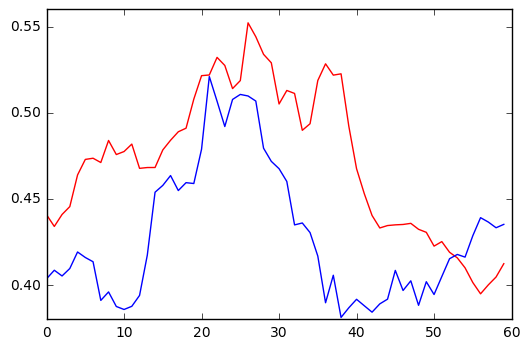

In [12]:
testvar_x = Variable(torch.FloatTensor((test_X)))
testvar_y = Variable(torch.FloatTensor((test_Y)))
testvar_y=testvar_y.view(testvar_y.shape[0],1)
out = net(testvar_x)
out=out.view(out.shape[0])
plt.plot(out.detach().numpy(),color='red')


plt.plot(test_Y)
plt.show()   

doesnt really work too well

In [13]:

# class lstm_reg(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size=1, num_layers=1):
#         super(lstm_reg, self).__init__()
        
#         self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
#         self.reg = nn.Linear(hidden_size, output_size) # 回归
        
#     def forward(self, x):
#         s= x.shape[0]
#         x=x.view(s,1,-1)
#         x, _ = self.rnn(x) # (seq, batch, hidden)
#         s, b, h = x.shape
#         #x = x.view(s, h) 
#         x = self.reg(x)
#         #x = x.view(s)
#         return x
# #declare model input size 1, hidden size 30
# hidden_size=200
# net = lstm_reg(window, hidden_size)
# #mseloss
# criterion = nn.MSELoss()
# #adam optimizer
# optimizer = torch.optim.Adam(net.parameters(), lr=.7)
# #train
# # h0=torch.FloatTensor(np.full((1,1,hidden_size),train_X[1]))
# # c0=torch.FloatTensor(np.full((1,1,hidden_size),train_X[1]))
# for e in range(2000):
    
#     var_x = Variable(torch.FloatTensor(train_X))
#     var_y = Variable(torch.FloatTensor(train_Y))
#     var_y=var_y.view(var_y.shape[0],1,-1)
#     #print(var_x.shape)
    
#     #print(var_x.shape)
#     out = net(var_x)
#     loss = criterion(out, var_y)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     if (e + 1) % 10 == 0: 
#         print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.data[0]))
        
# #now trained try to predict the validation series
# # h0=torch.FloatTensor(np.full((1,1,30),test_X[1]))
# # c0=torch.FloatTensor(np.full((1,1,30),test_X[1]))
# testvar_x = Variable(torch.FloatTensor((test_X)))
# testvar_y = Variable(torch.FloatTensor((test_Y)))
# testvar_y=testvar_y.view(testvar_y.shape[0],1,-1)
# out = net(testvar_x)
# loss = criterion(out, testvar_y)
# out=out.view(out.shape[0])
# plt.plot(out.detach().numpy())

# plt.show()
# plt.plot(test_Y)
# plt.show()       


# TLS VS RIDGE Reg

[0.00044306] 37 21


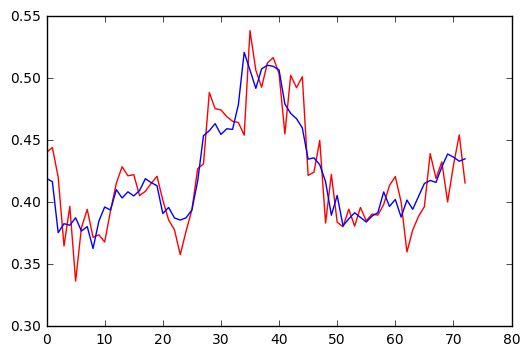

[0.00011721] 89 0.05


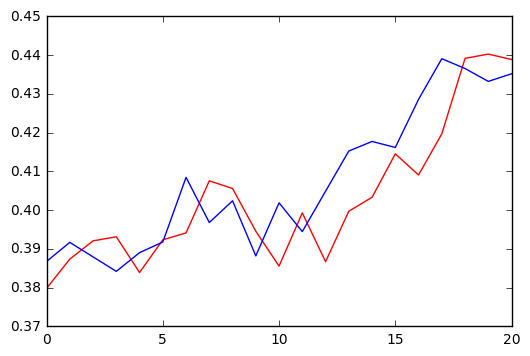

In [8]:
def getW_tls(X,y,d):
    X=np.array(X)
    y=np.array(y)
    y=y.reshape(y.shape[0],1)
#     print(X.shape)
#     print(y.shape)
    xy=np.concatenate((X,y),axis=1)
    u,s,v=np.linalg.svd(xy)
    XTX=X.T.dot(X)
    invertible=(XTX-(s[d]**2)*np.eye((XTX).shape[0],(XTX).shape[1]))
    inverted=np.linalg.inv(invertible)
    w=(inverted.dot(X.T)).dot(y)
    
    return w
def getW_ridge(X,y,lambda_):
    X=np.array(X)
    y=np.array(y)
    y=y.reshape(y.shape[0],1)
#     print(X.shape)
#     print(y.shape)
    xy=np.concatenate((X,y),axis=1)
    u,s,v=np.linalg.svd(xy)
    XTX=X.T.dot(X)
    invertible=(XTX+lambda_*np.eye((XTX).shape[0],(XTX).shape[1]))
    inverted=np.linalg.inv(invertible)
    w=(inverted.dot(X.T)).dot(y)
    return w
    
def fit(X,w,y):
    X=np.array(X)
    y_est=X.dot(w)
    loss=0
    for i,y_est_i in enumerate(y_est):
        loss+=(y_est_i-y[i])**2
    loss/=len(y_est)
    return y_est,loss
bestloss=9999
best_y_est=None
def make_sliding_window(X,window):
    X_slide=[[price for price in X[:window]]]
    y_slide=[X[window]]
    for i in range(1,(len(X)-(window+1))):
        X_slide.append([price for price in X[i:window+i]])
        y_slide.append(X[window+i])
    return X_slide,y_slide

best_window=0
best_y_test=None
bestd=0
for window in range(30,100):
    train_X,train_Y=make_sliding_window(train_X_raw,window)
    test_X,test_Y=make_sliding_window(test_X_raw,window)
    for d in range(window-1):
    

        w_tls=getW_tls(train_X,train_Y,d)
        
        y_est,loss=fit(test_X,w_tls,test_Y)
        if loss<bestloss:
            bestloss=loss
            bestd=d
            bestwindow=window
            best_y_est=y_est
            best_y_test=test_Y
            
        
print(bestloss,bestwindow,bestd)
plt.plot(best_y_est,color='red')
plt.plot(best_y_test)


plt.show()

bestloss=9999
best_y_est=None


best_window=0
best_y_test=None
bestd=0
for window in range(30,100):
    train_X,train_Y=make_sliding_window(train_X_raw,window)
    test_X,test_Y=make_sliding_window(test_X_raw,window)
    for lambda_ in [float(i)/100 for i in range(5,100)]:
    

        w_ridge=getW_ridge(train_X,train_Y,lambda_)
        
        y_est,loss=fit(test_X,w_ridge,test_Y)
        if loss<bestloss:
            bestloss=loss
            bestlam=lambda_
            bestwindow=window
            best_y_est=y_est
            best_y_test=test_Y
            
print(bestloss,bestwindow,bestlam)
plt.plot(best_y_est,color='red')
plt.plot(best_y_test)


plt.show()


    

### 

# Multiplicative Weight Updates

In [31]:
def make_binary_seq(prices):
    binseq=[] #0 corresponds to price drop, 1 is price up
    prev=prices[0]
    for i, price in enumerate(prices[1:]):
            if price>prev:
                binseq.append(1)
            else:
                binseq.append(0)
            prev=price
    return binseq
bitseq=make_binary_seq(data_X)
import random
import numpy as np
def sample(prob):
    if random.random()>prob:
        return 1
    else:
        return 0
def getL(real,estimate):
    counter0,counter1=0,0
    for i in range(len(estimate)):
        if real[i]==0:
            counter0+=1
        else:
            counter1+=1
    return counter0,counter1
def getW(L0,L1,learning_rate):
        return np.exp(-learning_rate*L0)/(np.exp(-learning_rate*L0)+np.exp(-learning_rate*L1)),np.exp(-learning_rate*L1)/(np.exp(-learning_rate*L0)+np.exp(-learning_rate*L1))
def MWU(bitseq,p0,learning_rate):
    bitestimate=[]
    w1=p0
    w0=1-p0
    L0,L1=0,0
    for i in range(len(bitseq)):
        bitestimate.append(sample(w0))
        L0,L1=getL(bitseq,bitestimate)
        w0,w1=getW(L0,L1,learning_rate)
    #bitestimate.append(sample(w0))
    return bitestimate

def hammingloss(bitseq,bitestimate):
    loss=0
    for i in range(len(bitseq)):
        if bitseq[i]!=bitestimate[i]:
            loss+=1
    return loss    
#print(bitseq)
learning_rates=[i/1000 for i in range(1,1000)]
p0s=[i/1000 for i in range(1,100)]
bestestimate=[]
best_loss=999
bestp0=0
bestrate=0
for i,rate in enumerate(learning_rates):
    for p0 in p0s:
        bitestimate=MWU(bitseq,p0,rate)
        loss=hammingloss(bitseq,bitestimate)
        if loss<best_loss:
            best_loss=loss
            bestestimate=bitestimate
            bestrate=rate
            bestp0=p0
        #print("Loss:"+str(loss)+", Accuracy:"+str(float((len(bitseq)-loss)/len(bitseq))))
    print(i)
        
print("p0:"+str(bestp0)+"learnrate:"+str(bestrate)+ "BestLoss:"+str(best_loss)+", BestAccuracy:"+str(float((len(bitseq)-best_loss)/len(bitseq))))
        
        
#print(bitestimate)


#print(len(bitseq),len(bitestimate))

            
        
        
    
        
        
        
        
        
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

56% accuracy, we can do better.

# ONLINE SGD prediction

In [69]:
def delta_seq(prices):
    deltas=[]
    last_price=prices[0]
    for i, price in enumerate(prices[1:]):
        deltas.append(price-last_price)
        last_price=price
    return deltas
#print(data_X)
data_X=onlineset
deltas=delta_seq(data_X)
#print(deltas)

def MWU(deltas,w0,etta,prices):
    purchases=[w0]
    for i,z in enumerate(deltas):
        candidate=purchases[i]+etta*z
        if candidate*prices[i+1]>100000000.0:
            candidate=100000000.0/prices[i+1]
            #print("hi")
        if candidate*prices[i+1]<-100000000.0:
            candidate=-100000000.0/prices[i+1]
        purchases.append(candidate)
        
        
    return purchases
def linearloss(purchases,deltas):
    loss=0
    #print(deltas)
    for i,z in enumerate(deltas):
        loss+=-z*purchases[i]
    return loss


learning_rates=[i/1000 for i in range(1,1000)]
w0s=[i for i in range(0,10)]
bestestimate=[]
best_loss=-99999
bestw0=0
bestrate=0
for i,rate in enumerate(learning_rates):
    for w0 in w0s:
        
        purchases=MWU(deltas,w0,rate,data_X)
        
        loss=linearloss(purchases,deltas)
        
        if loss>best_loss:
            best_loss=loss
            bestpurchases=purchases
            bestrate=rate
            bestw0=w0
        #print("Loss:"+str(loss)+", Accuracy:"+str(float((len(bitseq)-loss)/len(bitseq))))
    
        
print("w0:"+str(bestw0)+"learnrate:"+str(bestrate)+ "BestMoneyGained:"+str(best_loss) )
        
        
        
        
        
    
    
    
        
        

w0:0learnrate:0.352BestMoneyGained:16289437.385153584


finally some success